In [1]:
#Import few basic libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_df = pd.read_csv('Data/hotel_bookings.csv')

In [3]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#let us check for duplicate values

hotel_df.duplicated().any()

True

In [6]:
#there are duplicates, let us drop them using drop_duplicate
hotel_df.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
#let us check for missing values
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
hotel_df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [9]:
# filliing in the children missing value columns 
# we will fill it with mode since in some case median or mean of a value is a float and you can't have a float value children

hotel_df['children'] = hotel_df['children'].fillna(0)
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# the country column we will fill it with the most frequent value of the column 

hotel_df['country'] = hotel_df['country'].fillna(hotel_df['country'].value_counts().index[0])
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# we will drop both company and agent column as the value is too high to fill the gap

hotel_df = hotel_df.drop(columns = ['agent', 'company'])
hotel_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

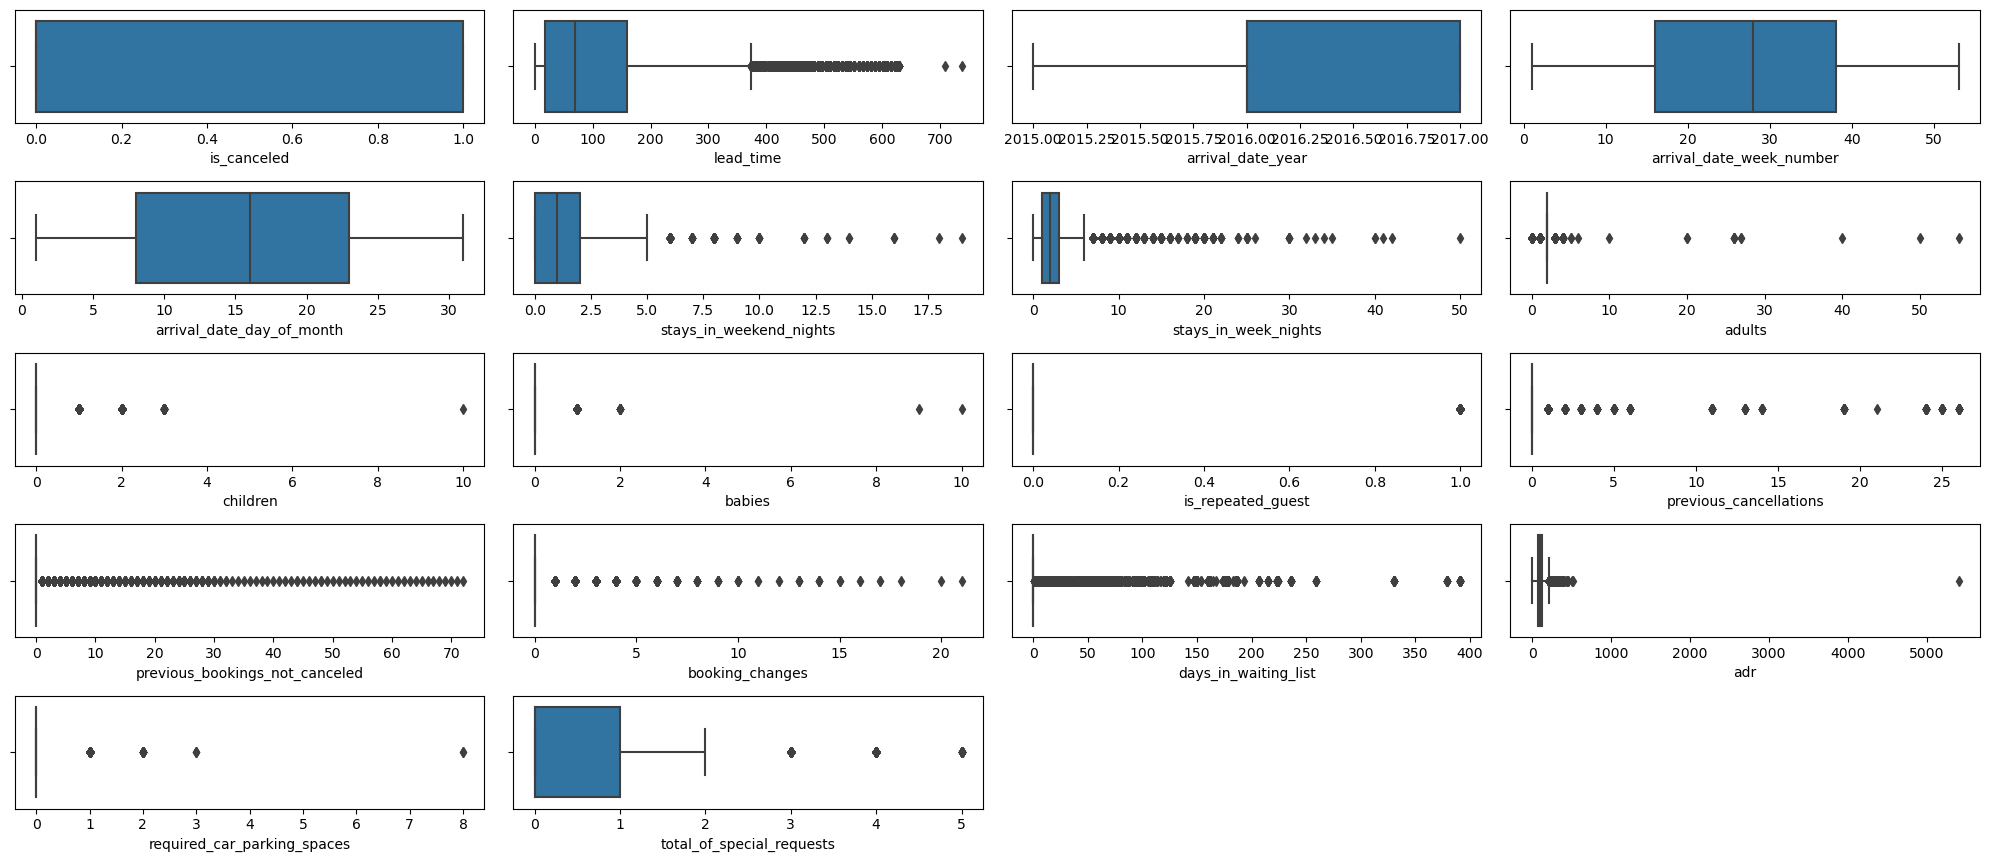

In [12]:
### since the there is no null value anymore in the data now i will check the outliers 

plt.figure(figsize = (20, 10))
x = 1 

for column in hotel_df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(hotel_df[column])
    x+=1
    
plt.tight_layout()

- we can see that there are many outliers in many of the columns. 
- we will handle the outliers by binning the columns that has outliers in it and from the box plot there are columns that has a random value like 0 number of adults and negative amount of adr 

In [13]:
# since it's impossible to have 0 adults to book a hotel room 
hotel_df.drop(labels = hotel_df[hotel_df['adults'] == 0].index, axis = 0, inplace = True)

# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
hotel_df = hotel_df.drop(hotel_df[hotel_df.adr < 0].index)

# and one extra value of 5000 adr which is out of range and is a genuine outlier
hotel_df = hotel_df.drop(hotel_df[hotel_df.adr > 5000].index)

In [14]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
hotel_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [17]:
hotel_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [18]:
# preprocessing label using .map because there are only 2 unique values
hotel_df['hotel_encoded'] = hotel_df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

In [19]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 
               'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']

hotel_df.drop(useless_col, axis = 1, inplace = True)

In [20]:
# encoding categorical variables
hotel_df['meal'] = hotel_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

hotel_df['market_segment'] = hotel_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

hotel_df['distribution_channel'] = hotel_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

hotel_df['reserved_room_type'] = hotel_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

hotel_df['deposit_type'] = hotel_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

hotel_df['customer_type'] = hotel_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})


In [21]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_month              118985 non-null  object 
 4   arrival_date_week_number        118985 non-null  int64  
 5   arrival_date_day_of_month       118985 non-null  int64  
 6   stays_in_weekend_nights         118985 non-null  int64  
 7   stays_in_week_nights            118985 non-null  int64  
 8   adults                          118985 non-null  int64  
 9   children                        118985 non-null  float64
 10  babies                          118985 non-null  int64  
 11  meal                            118985 non-null  int64  
 12  market_segment  

In [22]:
hotel_df = hotel_df.drop(['reservation_status_date', 'arrival_date_month'], axis=1)

In [26]:
hotel_df = hotel_df.drop(['hotel'], axis=1)

In [23]:
hotel_df['is_canceled'].unique()

array([0, 1])

### Splitting the Data

In [27]:
x = hotel_df.drop(['is_canceled'], axis=1)
y = hotel_df['is_canceled']

In [28]:
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

In [29]:
x.shape

(118985, 21)

In [30]:
y.shape

(118985,)

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 12345)

In [32]:
x_train.shape

(95188, 21)

In [33]:
x_test.shape

(23797, 21)

### Defining Model

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

2023-05-03 14:08:18.904954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model_bc = Sequential()
model_bc.add(Dense(40, activation='relu', input_shape=(21,)))
model_bc.add(Dense(10, activation='relu'))
model_bc.add(Dense(1, activation='sigmoid'))

In [38]:
model_bc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bc.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
595/595 [==============================] - 10s 9ms/step - loss: 1.5318 - accuracy: 0.7034 - val_loss: 0.4749 - val_accuracy: 0.7719
Epoch 2/10
595/595 [==============================] - 4s 7ms/step - loss: 0.4731 - accuracy: 0.7670 - val_loss: 0.4791 - val_accuracy: 0.7488
Epoch 3/10
595/595 [==============================] - 4s 7ms/step - loss: 0.4568 - accuracy: 0.7766 - val_loss: 0.4380 - val_accuracy: 0.7883
Epoch 4/10
595/595 [==============================] - 4s 7ms/step - loss: 0.4567 - accuracy: 0.7763 - val_loss: 0.4531 - val_accuracy: 0.7710
Epoch 5/10
595/595 [==============================] - 5s 8ms/step - loss: 0.4553 - accuracy: 0.7791 - val_loss: 0.4515 - val_accuracy: 0.7815
Epoch 6/10
595/595 [==============================] - 5s 8ms/step - loss: 0.4510 - accuracy: 0.7808 - val_loss: 0.4332 - val_accuracy: 0.7924
Epoch 7/10
595/595 [==============================] - 6s 9ms/step - loss: 0.4466 - accuracy: 0.7828 - val_loss: 0.4575 - val_accuracy: 0.7777
Epoch

In [40]:
#Evaluating the model
test_loss, test_acc = model_bc.evaluate(x_test,  y_test, verbose=2)

744/744 - 3s - loss: 0.4278 - accuracy: 0.7966 - 3s/epoch - 5ms/step


In [41]:
print('Test loss is ',test_loss)
print('Test Accuracy is ',test_acc)

Test loss is  0.4278489649295807
Test Accuracy is  0.7965710163116455
